# This is Jonas' Notebook

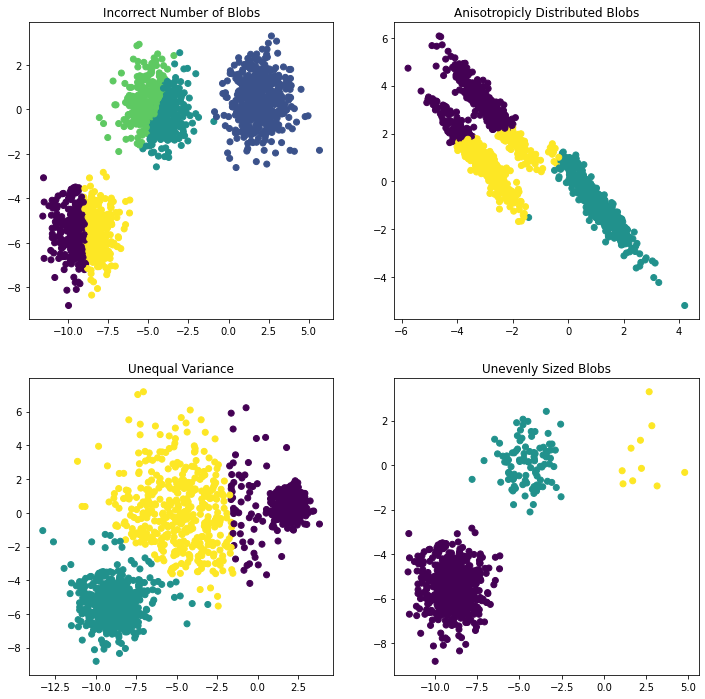

In [1]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=5, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

In [2]:
import pandas as pd

In [3]:
print("hello")

hello


# headline
## headline

this is text
**bold text**
*italics*

- bulletpoint1
- bulletpoint2
- bulletpoint3

# Random dataset generator

In [4]:
import numpy as np
import pandas as pd

city_list = ["paris", "barcelona", "kolkata", "new york"]
color_list = ["red", "blue", "green", "yellow"]
gender_list = ["male","female"]
height_list = np.arange(100,200,5)

random_df = pd.DataFrame()
length = 10000
random_df["city"] = np.random.choice(city_list, length)
random_df["color"] = np.random.choice(color_list, length)
random_df["height"] = np.random.choice(height_list, length)
random_df["gender"] = np.random.choice(gender_list, length)

random_df

,city,color,height,gender
0,barcelona,green,110,male
1,new york,green,195,female
2,kolkata,yellow,110,male
3,barcelona,yellow,140,female
4,paris,yellow,105,male
...,...,...,...,...
9995,new york,yellow,140,male
9996,kolkata,red,175,female
9997,new york,green,120,male
9998,paris,yellow,145,male


In [5]:
city_df = pd.DataFrame()
city_df["index"] = city_list
city_df["city_int"] = np.arange(0, len(city_list))
city_df

,index,city_int
0,paris,0
1,barcelona,1
2,kolkata,2
3,new york,3


In [6]:
color_df = pd.DataFrame()
color_df["index"] = color_list
color_df["color_int"] = np.arange(0, len(color_list))
color_df

,index,color_int
0,red,0
1,blue,1
2,green,2
3,yellow,3


In [7]:
gender_df = pd.DataFrame()
gender_df["index"] = gender_list
gender_df["gender_int"] = np.arange(0, len(gender_list))
gender_df

,index,gender_int
0,male,0
1,female,1


In [8]:
random_df = random_df.merge(city_df, how="left", left_on="city", right_on="index")

In [9]:
random_df = random_df.merge(color_df, how="left", left_on="color", right_on="index")

In [10]:
random_df = random_df.merge(gender_df, how="left", left_on="gender", right_on="index")

In [11]:
random_df

,city,color,height,gender,index_x,city_int,index_y,color_int,index,gender_int
0,barcelona,green,110,male,barcelona,1,green,2,male,0
1,new york,green,195,female,new york,3,green,2,female,1
2,kolkata,yellow,110,male,kolkata,2,yellow,3,male,0
3,barcelona,yellow,140,female,barcelona,1,yellow,3,female,1
4,paris,yellow,105,male,paris,0,yellow,3,male,0
...,...,...,...,...,...,...,...,...,...,...
9995,new york,yellow,140,male,new york,3,yellow,3,male,0
9996,kolkata,red,175,female,kolkata,2,red,0,female,1
9997,new york,green,120,male,new york,3,green,2,male,0
9998,paris,yellow,145,male,paris,0,yellow,3,male,0


In [12]:
random_df[["city_int", "color_int", "gender_int"]]

,city_int,color_int,gender_int
0,1,2,0
1,3,2,1
2,2,3,0
3,1,3,1
4,0,3,0
...,...,...,...
9995,3,3,0
9996,2,0,1
9997,3,2,0
9998,0,3,0


In [13]:
# export as csv
random_df.to_csv("random_dataset.csv", index=False)

## Sort by category list

In [14]:
sort_list = int(len(random_df)/len(city_list))*city_list

In [15]:
random_df.sort_values(["city"], key=sort_list)

TypeError: 'list' object is not callable

# Clustering with pairing

In [16]:
import numpy as np
import pandas as pd

previous_class_list = ["Uldah_4a", "Gridania_4a", "Pandora_4a", "Reach_4a", "Queensdale_4a",
                      "Uldah_4b", "Gridania_4b", "Pandora_4b", "Reach_4b", "Queensdale_4b",
                      "Uldah_4c", "Gridania_4c", "Pandora_4c", "Reach_4c", "Queensdale_4c"]
color_list = ["red", "blue", "green", "yellow", "purple", "orange"]
gender_list = ["male","female"]
reading_list = ["level 1", "level 2", "level 3", "level 4"]
hobby_list = ["soccer", "swimming", "dancing", "scouts", "gymnastics"]
language_list = ["German", "Dutch", "American", "Turkish", "Japanese"]
introverted_list = ["yes", "no"]
# before siblings_list = ["no", "1", "2", "3", "4"]
siblings_list = [0, 1, 2, 3, 4]

random_df = pd.DataFrame()
length = 300
random_df["previous_class"] = np.random.choice(previous_class_list, length)
random_df["color"] = np.random.choice(color_list, length)
random_df["gender"] = np.random.choice(gender_list, length)
random_df["reading"] = np.random.choice(reading_list, length)
random_df["hobby"] = np.random.choice(hobby_list, length)
random_df["language"] = np.random.choice(language_list, length)
random_df["introverted"] = np.random.choice(introverted_list, length)
random_df["siblings"] = np.random.choice(siblings_list, length)
random_df

,previous_class,color,gender,reading,hobby,language,introverted,siblings
0,Uldah_4a,yellow,male,level 3,dancing,Dutch,yes,0
1,Uldah_4a,red,female,level 4,dancing,Turkish,no,2
2,Queensdale_4c,red,male,level 2,soccer,German,no,4
3,Reach_4c,green,male,level 3,gymnastics,Turkish,yes,0
4,Queensdale_4a,red,male,level 4,soccer,Japanese,no,1
...,...,...,...,...,...,...,...,...
295,Reach_4a,purple,female,level 4,gymnastics,Turkish,yes,0
296,Uldah_4c,purple,male,level 2,soccer,American,yes,1
297,Reach_4b,green,male,level 3,soccer,Turkish,yes,0
298,Reach_4a,yellow,female,level 3,gymnastics,German,no,1


In [17]:
# assuming city is school
# (example of filtering)
filtered_df = random_df[random_df["previous_class"]=="Pandora_4a"]
filtered_df.reset_index(drop=True, inplace=True)
filtered_df

,previous_class,color,gender,reading,hobby,language,introverted,siblings
0,Pandora_4a,red,female,level 1,scouts,Japanese,no,2
1,Pandora_4a,purple,male,level 4,swimming,Turkish,no,2
2,Pandora_4a,purple,female,level 2,dancing,Turkish,yes,1
3,Pandora_4a,red,male,level 1,dancing,Japanese,no,4
4,Pandora_4a,purple,male,level 3,swimming,German,yes,3
5,Pandora_4a,orange,male,level 3,soccer,Dutch,yes,3
6,Pandora_4a,green,female,level 4,scouts,German,yes,1
7,Pandora_4a,red,male,level 3,soccer,American,no,4
8,Pandora_4a,orange,male,level 3,scouts,German,yes,4
9,Pandora_4a,purple,female,level 2,dancing,German,yes,1


In [33]:
df_friends_prob = []
for previous_class in previous_class_list:
    filtered_df1 = random_df[(random_df["previous_class"]==previous_class) & (random_df["gender"]=="male")]
    index_list = filtered_df1.index
    list_of_random_floats = np.random.random(len(index_list))
    sum_of_values = list_of_random_floats.sum()
    probabilities_list = list_of_random_floats / sum_of_values
    filtered_df1["friend1"] = np.random.choice(index_list, len(index_list), p=probabilities_list)
    filtered_df1["friend2"] = np.random.choice(index_list, len(index_list), p=probabilities_list)
    df_friends_prob.append(filtered_df1)
    
    filtered_df2 = random_df[(random_df["previous_class"]==previous_class) & (random_df["gender"]=="female")]
    index_list = filtered_df2.index
    list_of_random_floats = np.random.random(len(index_list))
    sum_of_values = list_of_random_floats.sum()
    probabilities_list = list_of_random_floats / sum_of_values
    filtered_df2["friend1"] = np.random.choice(index_list, len(index_list), p=probabilities_list)
    filtered_df2["friend2"] = np.random.choice(index_list, len(index_list), p=probabilities_list)
    df_friends_prob.append(filtered_df2)
    
    new_df_friends_prob = pd.concat(df_friends_prob)
    new_df_friends_prob.reset_index(inplace=True)
    new_df_friends_prob.rename(columns = {"index":"id"}, inplace = True)
    
new_df_friends_prob


<ipython-input-33-d78b23f14201>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1["friend1"] = np.random.choice(index_list, len(index_list), p=probabilities_list)
<ipython-input-33-d78b23f14201>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1["friend2"] = np.random.choice(index_list, len(index_list), p=probabilities_list)
<ipython-input-33-d78b23f14201>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,id,previous_class,color,gender,reading,hobby,language,introverted,siblings,friend1,friend2
0,0,Uldah_4a,yellow,male,level 3,dancing,Dutch,yes,0,51,0
1,7,Uldah_4a,purple,male,level 3,scouts,German,no,1,51,0
2,34,Uldah_4a,red,male,level 1,soccer,Japanese,yes,3,51,0
3,51,Uldah_4a,green,male,level 2,dancing,Japanese,yes,0,51,100
4,76,Uldah_4a,purple,male,level 4,dancing,American,yes,1,51,51
...,...,...,...,...,...,...,...,...,...,...,...
295,167,Queensdale_4c,purple,female,level 4,gymnastics,Turkish,no,4,44,159
296,187,Queensdale_4c,purple,female,level 3,scouts,American,no,0,159,159
297,242,Queensdale_4c,yellow,female,level 3,dancing,Japanese,yes,3,62,62
298,267,Queensdale_4c,green,female,level 1,dancing,Japanese,yes,4,299,58


In [34]:
# dataframe without self-assigning students 

cleaned_df_friends = new_df_friends_prob.loc[(new_df_friends_prob["id"]!=new_df_friends_prob["friend1"]) & (new_df_friends_prob["id"]!=new_df_friends_prob["friend2"])]                                           

In [35]:
cleaned_df_friends

,id,previous_class,color,gender,reading,hobby,language,introverted,siblings,friend1,friend2
1,7,Uldah_4a,purple,male,level 3,scouts,German,no,1,51,0
2,34,Uldah_4a,red,male,level 1,soccer,Japanese,yes,3,51,0
4,76,Uldah_4a,purple,male,level 4,dancing,American,yes,1,51,51
5,100,Uldah_4a,orange,male,level 2,dancing,German,yes,1,0,51
6,106,Uldah_4a,green,male,level 2,gymnastics,Turkish,yes,1,100,7
...,...,...,...,...,...,...,...,...,...,...,...
295,167,Queensdale_4c,purple,female,level 4,gymnastics,Turkish,no,4,44,159
296,187,Queensdale_4c,purple,female,level 3,scouts,American,no,0,159,159
297,242,Queensdale_4c,yellow,female,level 3,dancing,Japanese,yes,3,62,62
298,267,Queensdale_4c,green,female,level 1,dancing,Japanese,yes,4,299,58


In [36]:
#transform string to integer using mapping

for column in ['previous_class', 'color', 'gender', 'reading', 'hobby', 'language', 'introverted']:
    mapping = {k: v for v, k in enumerate(cleaned_df_friends[column].unique())}
    cleaned_df_friends[column + '_int'] = cleaned_df_friends[column].map(mapping)

cleaned_df_friends

<ipython-input-36-b8bc6495e560>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_friends[column + '_int'] = cleaned_df_friends[column].map(mapping)


,id,previous_class,color,gender,reading,hobby,language,introverted,siblings,friend1,friend2,previous_class_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int
1,7,Uldah_4a,purple,male,level 3,scouts,German,no,1,51,0,0,0,0,0,0,0,0
2,34,Uldah_4a,red,male,level 1,soccer,Japanese,yes,3,51,0,0,1,0,1,1,1,1
4,76,Uldah_4a,purple,male,level 4,dancing,American,yes,1,51,51,0,0,0,2,2,2,1
5,100,Uldah_4a,orange,male,level 2,dancing,German,yes,1,0,51,0,2,0,3,2,0,1
6,106,Uldah_4a,green,male,level 2,gymnastics,Turkish,yes,1,100,7,0,3,0,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,167,Queensdale_4c,purple,female,level 4,gymnastics,Turkish,no,4,44,159,14,0,1,2,3,3,0
296,187,Queensdale_4c,purple,female,level 3,scouts,American,no,0,159,159,14,0,1,0,0,2,0
297,242,Queensdale_4c,yellow,female,level 3,dancing,Japanese,yes,3,62,62,14,4,1,0,2,1,1
298,267,Queensdale_4c,green,female,level 1,dancing,Japanese,yes,4,299,58,14,3,1,1,2,1,1


In [26]:
# transform string to integer
city_df = pd.DataFrame()
city_df["index"] = pd.unique(filtered_df["city"])
city_df["city_int"] = np.arange(0, len(pd.unique(filtered_df["city"])))
filtered_df = filtered_df.merge(city_df, how="left", left_on="city", right_on="index", copy=False)

color_df = pd.DataFrame()
color_df["index"] = pd.unique(filtered_df["color"])
color_df["color_int"] = np.arange(0, len(pd.unique(filtered_df["color"])))
filtered_df = filtered_df.merge(color_df, how="left", left_on="color", right_on="index", copy=False)

gender_df = pd.DataFrame()
gender_df["index"] = pd.unique(filtered_df["gender"])
gender_df["gender_int"] = np.arange(0, len(pd.unique(filtered_df["gender"])))
filtered_df = filtered_df.merge(gender_df, how="left", left_on="gender", right_on="index", copy=False)

reading_df = pd.DataFrame()
reading_df["index"] = pd.unique(filtered_df["reading"])
reading_df["reading_int"] = np.arange(0, len(pd.unique(filtered_df["reading"])))
filtered_df = filtered_df.merge(reading_df, how="left", left_on="reading", right_on="index", copy=False)

hobby_df = pd.DataFrame()
hobby_df["index"] = pd.unique(filtered_df["hobby"])
hobby_df["hobby_int"] = np.arange(0, len(pd.unique(filtered_df["hobby"])))
filtered_df = filtered_df.merge(hobby_df, how="left", left_on="hobby", right_on="index", copy=False)

language_df = pd.DataFrame()
language_df["index"] = pd.unique(filtered_df["language"])
language_df["language_int"] = np.arange(0, len(pd.unique(filtered_df["language"])))
filtered_df = filtered_df.merge(language_df, how="left", left_on="language", right_on="index", copy=False)

introverted_df = pd.DataFrame()
introverted_df["index"] = pd.unique(filtered_df["introverted"])
introverted_df["introverted_int"] = np.arange(0, len(pd.unique(filtered_df["introverted"])))
filtered_df = filtered_df.merge(introverted_df, how="left", left_on="introverted", right_on="index", copy=False)

filtered_df

KeyError: 'city'

In [37]:
cleaned_df_friends.head()

,id,previous_class,color,gender,reading,hobby,language,introverted,siblings,friend1,friend2,previous_class_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int
1,7,Uldah_4a,purple,male,level 3,scouts,German,no,1,51,0,0,0,0,0,0,0,0
2,34,Uldah_4a,red,male,level 1,soccer,Japanese,yes,3,51,0,0,1,0,1,1,1,1
4,76,Uldah_4a,purple,male,level 4,dancing,American,yes,1,51,51,0,0,0,2,2,2,1
5,100,Uldah_4a,orange,male,level 2,dancing,German,yes,1,0,51,0,2,0,3,2,0,1
6,106,Uldah_4a,green,male,level 2,gymnastics,Turkish,yes,1,100,7,0,3,0,3,3,3,1


In [39]:
# drop unnecessary columns
cleaned_df_friends = cleaned_df_friends[['id', 'previous_class_int',
       'color_int', 'gender_int', 'reading_int', 'hobby_int', 'language_int',
       'introverted_int', 'siblings', 'friend1', 'friend2']]
cleaned_df_friends.head()

# export as csv
cleaned_df_friends.to_csv("new_df_friends_classes_big.csv")

In [49]:
# cluster test data
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5, init = "k-means++", random_state = 42)

data_df = filtered_df[['siblings', 'friends', 'city_int', 
       'color_int', 'gender_int','reading_int',
       'hobby_int', 'language_int', 
       'introverted_int']]

kmeans = kmeans.fit(data_df)
data_df["Clusters"] = kmeans.labels_
data_df.head(10)

KeyError: "['friends'] not in index"

In [24]:
# how many students per clusters?
data_df["Clusters"].value_counts()

0    418
3    399
2    397
4    386
1    384
Name: Clusters, dtype: int64

In [25]:
# how many pairs are in the same custer? (write a function and loop for this)
data_df[data_df.index==0]

,siblings,friends,city_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int,Clusters
0,2,762,0,0,0,0,0,0,0,4


In [26]:
data_df[data_df.index==445]

,siblings,friends,city_int,color_int,gender_int,reading_int,hobby_int,language_int,introverted_int,Clusters
445,2,195,0,1,0,1,3,1,1,1


In [27]:
summary_df = pd.DataFrame()

for i in data_df.index:
    p1_cluster = data_df.loc[data_df.index==i, "Clusters"].values[0]
    p2_cluster = data_df.loc[data_df.index==data_df.loc[data_df.index==i, "friends"].values[0], "Clusters"].values[0]
    summary_df.at[i, "index"] = i
    summary_df.at[i, "p1_cluster"] = p1_cluster
    summary_df.at[i, "p2_cluster"] = p2_cluster
    summary_df.at[i, "same"] = p1_cluster-p2_cluster

In [28]:
summary_df

,index,p1_cluster,p2_cluster,same
0,0.0,4.0,3.0,1.0
1,1.0,1.0,1.0,0.0
2,2.0,3.0,1.0,2.0
3,3.0,3.0,3.0,0.0
4,4.0,4.0,3.0,1.0
...,...,...,...,...
1979,1979.0,2.0,2.0,0.0
1980,1980.0,3.0,0.0,3.0
1981,1981.0,4.0,2.0,2.0
1982,1982.0,2.0,2.0,0.0


In [29]:
summary_df["same"].value_counts()

 0.0    418
 1.0    307
-2.0    269
-1.0    261
 2.0    237
 3.0    172
-3.0    164
-4.0     89
 4.0     67
Name: same, dtype: int64

In [30]:
401/len(summary_df)

0.20211693548387097

In [5]:
pip install networkx --upgrade

     |████████████████████████████████| 1.9 MB 824 kB/s eta 0:00:01
  Attempting uninstall: networkx
    Found existing installation: networkx 2.5
    Uninstalling networkx-2.5:
      Successfully uninstalled networkx-2.5
Note: you may need to restart the kernel to use updated packages.
